In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import visual_behavior.plotting as vbp

from visual_behavior.visualization import utils as ut
from visual_behavior.visualization.qc import data_loading as dl
from visual_behavior.visualization.qc import session_plots as sp
from visual_behavior.visualization.qc import plotting_utils as pu
from visual_behavior.visualization.qc import data_processing as dp
from visual_behavior.visualization.qc import experiment_plots as ep
from visual_behavior.visualization.qc import container_plots as cp

In [11]:
import visual_behavior.database as db
from visual_behavior.utilities import EyeTrackingData

In [4]:
%widescreen

In [8]:
def make_eye_matrix_plot(ophys_experiment_id, ax):
    ax = np.array(ax)
    try:
        ophys_session_id = db.convert_id({'ophys_experiment_id': ophys_experiment_id}, 'ophys_session_id')
        ed = EyeTrackingData(ophys_session_id)

        frames = np.linspace(0, len(ed.ellipse_fits['pupil']) - 1, len(ax.flatten())).astype(int)
        for ii, frame in enumerate(frames):
            axis = ax.flatten()[ii]
            axis.imshow(ed.get_annotated_frame(frame))
            axis.axis('off')
            axis.text(5, 5, 'frame {}'.format(frame), ha='left', va='top', color='yellow', fontsize=8)

        ax[0][0].set_title('ophys_experiment_id = {}, {} evenly spaced sample eye tracking frames'.format(ophys_experiment_id, len(frames)), ha='left')

    except Exception as e:
        for ii in range(len(ax.flatten())):
            axis = ax.flatten()[ii]
            axis.axis('off')

            error_text = 'could not generate pupil plot for ophys_experiment_id {}\n{}'.format(ophys_experiment_id, e)
            ax[0][0].set_title(error_text, ha='left')
    return ax

In [2]:
def plot_eye_tracking_sample_frames(ophys_container_id, save_figure=True):
    table = dl.get_filtered_ophys_experiment_table()
    ophys_experiment_ids = table.query('container_id == {}'.format(ophys_container_id)).sort_values(by='date_of_acquisition')['ophys_experiment_id']

    fig = plt.figure(figsize=(16, 5 * len(ophys_experiment_ids)))
    axes = []
    nplots = len(ophys_experiment_ids)
    buffer = 0.05
    for ii, ophys_experiment_id in enumerate(ophys_experiment_ids):
        print('on ophys_experiment_id {}, #{} of {}'.format(ophys_experiment_id, ii + 1, nplots))
        axes.append(vbp.placeAxesOnGrid(fig, dim=(3, 10), xspan=(0, 1), yspan=(ii / nplots + buffer, (ii + 1) / nplots)))
        axes[-1] = ep.make_eye_matrix_plot(ophys_experiment_id, axes[-1])

    savepath = os.path.join(dl.get_container_plots_dir(), 'eyetracking_sample_frames', 'container_{}.png'.format(ophys_container_id))
    fig.savefig(savepath, dpi=300, pad_inches=0.0, bbox_inches='tight')

    return fig, axes

In [7]:
ophys_container_id = 1016840755

table = dl.get_filtered_ophys_experiment_table()
ophys_experiment_ids = table.query('container_id == {}'.format(ophys_container_id)).sort_values(by='date_of_acquisition')['ophys_experiment_id']
ophys_experiment_ids

1777    839716149
1788    840460378
1795    840717538
1780    841969467
1770    842545444
Name: ophys_experiment_id, dtype: int64

In [37]:
ophys_experiment_id = ophys_experiment_ids.iloc[0]
ophys_session_id = db.convert_id({'ophys_experiment_id': ophys_experiment_id}, 'ophys_session_id')
ed = EyeTrackingData(ophys_session_id)

/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



In [13]:
ed.ellipse_fits['pupil']

,center_x,center_y,height,phi,width,area,time,frame,likely_outlier,likely_blinks,blink_corrected_center_x,blink_corrected_center_y,blink_corrected_height,blink_corrected_phi,blink_corrected_width,blink_corrected_area,blink_corrected_likely_outlier,normalized_blink_corrected_area
0,375.521565,243.422674,39.846359,-0.011423,44.063144,6099.592677,0.22109,0,False,False,375.521565,243.422674,39.846359,-0.011423,44.063144,6099.592677,0.0,0.535181
1,375.829637,243.590248,39.681373,-0.013824,44.247401,6150.712288,0.27406,1,False,False,375.829637,243.590248,39.681373,-0.013824,44.247401,6150.712288,0.0,0.539666
2,377.041246,243.489098,40.030507,0.078090,44.420364,6198.892286,0.27562,2,False,False,377.041246,243.489098,40.030507,0.078090,44.420364,6198.892286,0.0,0.543894
3,377.285312,242.697679,40.459177,0.035987,44.622595,6255.463967,0.31872,3,False,False,377.285312,242.697679,40.459177,0.035987,44.622595,6255.463967,0.0,0.548857
4,376.324375,243.289364,40.172812,0.059727,44.200339,6137.635103,0.35627,4,False,False,376.324375,243.289364,40.172812,0.059727,44.200339,6137.635103,0.0,0.538519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142690,361.632467,246.034152,51.752735,0.132543,57.274875,10305.716063,4760.96550,142690,False,False,361.632467,246.034152,51.752735,0.132543,57.274875,10305.716063,0.0,0.904228
142691,361.066924,246.018030,51.476901,0.138168,57.415088,10356.236033,4760.99493,142691,False,False,361.066924,246.018030,51.476901,0.138168,57.415088,10356.236033,0.0,0.908661
142692,360.345054,246.631756,52.253222,0.111921,57.859390,10517.137903,4761.02528,142692,False,True,361.066924,246.018030,51.476901,0.138168,57.415088,10356.236033,0.0,0.908661
142693,362.213532,246.387015,52.739753,0.038585,58.180795,10634.306531,4761.05862,142693,False,True,361.066924,246.018030,51.476901,0.138168,57.415088,10356.236033,0.0,0.908661


(0.0036848333333333334, 79.35154416666666)

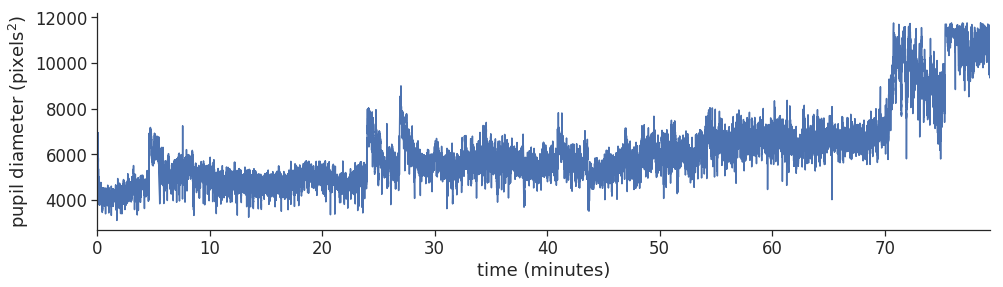

In [22]:
fig,ax=plt.subplots(figsize=(16,4))
time = ed.ellipse_fits['pupil']['time']/60.
area = ed.ellipse_fits['pupil']['blink_corrected_area']
ax.plot(time,area)
ax.set_xlabel('time (minutes)')
ax.set_ylabel('pupil diameter (pixels$^2$)')
ax.set_xlim(min(time),max(time))

In [34]:
def make_pupil_area_plot(ophys_experiment_id, ax, label_x=True):
    try:
        ophys_session_id = db.convert_id({'ophys_experiment_id': ophys_experiment_id}, 'ophys_session_id')
        ed = EyeTrackingData(ophys_session_id)

        time = ed.ellipse_fits['pupil']['time']/60.
        area = ed.ellipse_fits['pupil']['blink_corrected_area']
        ax.plot(time,area)
        if label_x:
            ax.set_xlabel('time (minutes)')
        ax.set_ylabel('pupil diameter (pixels$^2$)')
        ax.set_xlim(min(time),max(time))

        ax.set_title('ophys_experiment_id = {}, pupil area vs. time'.format(ophys_experiment_id), ha='center')

    except Exception as e:
        ax.axis('off')

        error_text = 'could not generate pupil area plot for ophys_experiment_id {}\n{}'.format(ophys_experiment_id, e)
        ax.set_title(error_text, ha='left')
    return ax

/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



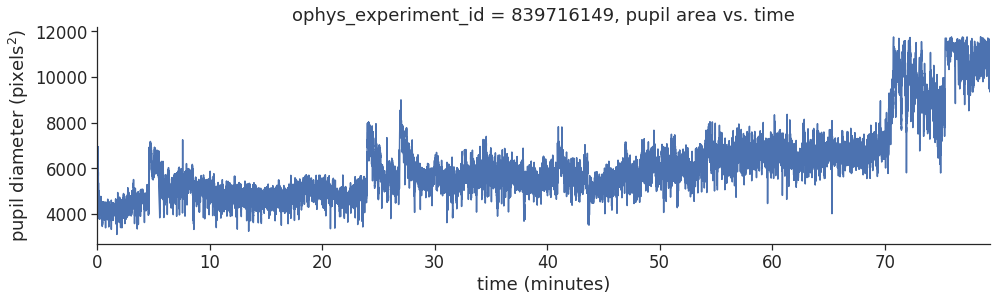

In [36]:
fig,ax=plt.subplots(figsize=(16,4))
ep.make_pupil_area_plot(ophys_experiment_id, ax)

In [57]:
def plot_pupil_area(ophys_container_id, save_figure=True):
    table = dl.get_filtered_ophys_experiment_table()
    ophys_experiment_ids = table.query('container_id == {}'.format(ophys_container_id)).sort_values(by='date_of_acquisition')['ophys_experiment_id']

    fig = plt.figure(figsize=(16, 4 * len(ophys_experiment_ids)))
    axes = []
    nplots = len(ophys_experiment_ids)
    buffer = 0.075
    for ii, ophys_experiment_id in enumerate(ophys_experiment_ids):
        print('on ophys_experiment_id {}, #{} of {}'.format(ophys_experiment_id, ii + 1, nplots))
        axes.append(vbp.placeAxesOnGrid(fig, xspan=(0, 1), yspan=(ii / nplots + buffer, (ii + 1) / nplots)))
        if ii + 1 == len(ophys_experiment_ids):
            label_x = True
        else:
            label_x = False
        axes[-1] = ep.make_pupil_area_plot(ophys_experiment_id, axes[-1], label_x=label_x)

    if save_figure:
        print('saving')
        save_folder = os.path.join(dl.get_container_plots_dir(), 'pupil_area_vs_time')
        if os.path.exists(save_folder) == False:
            os.mkdir(save_folder)
        savepath = os.path.join(save_folder, 'container_{}.png'.format(ophys_container_id))
        fig.savefig(savepath, dpi=300, pad_inches=0.0, bbox_inches='tight')

    return fig, axes

on ophys_experiment_id 839716149, #1 of 5


/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



on ophys_experiment_id 840460378, #2 of 5


/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



on ophys_experiment_id 840717538, #3 of 5


/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



on ophys_experiment_id 841969467, #4 of 5


/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



on ophys_experiment_id 842545444, #5 of 5


/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



saving


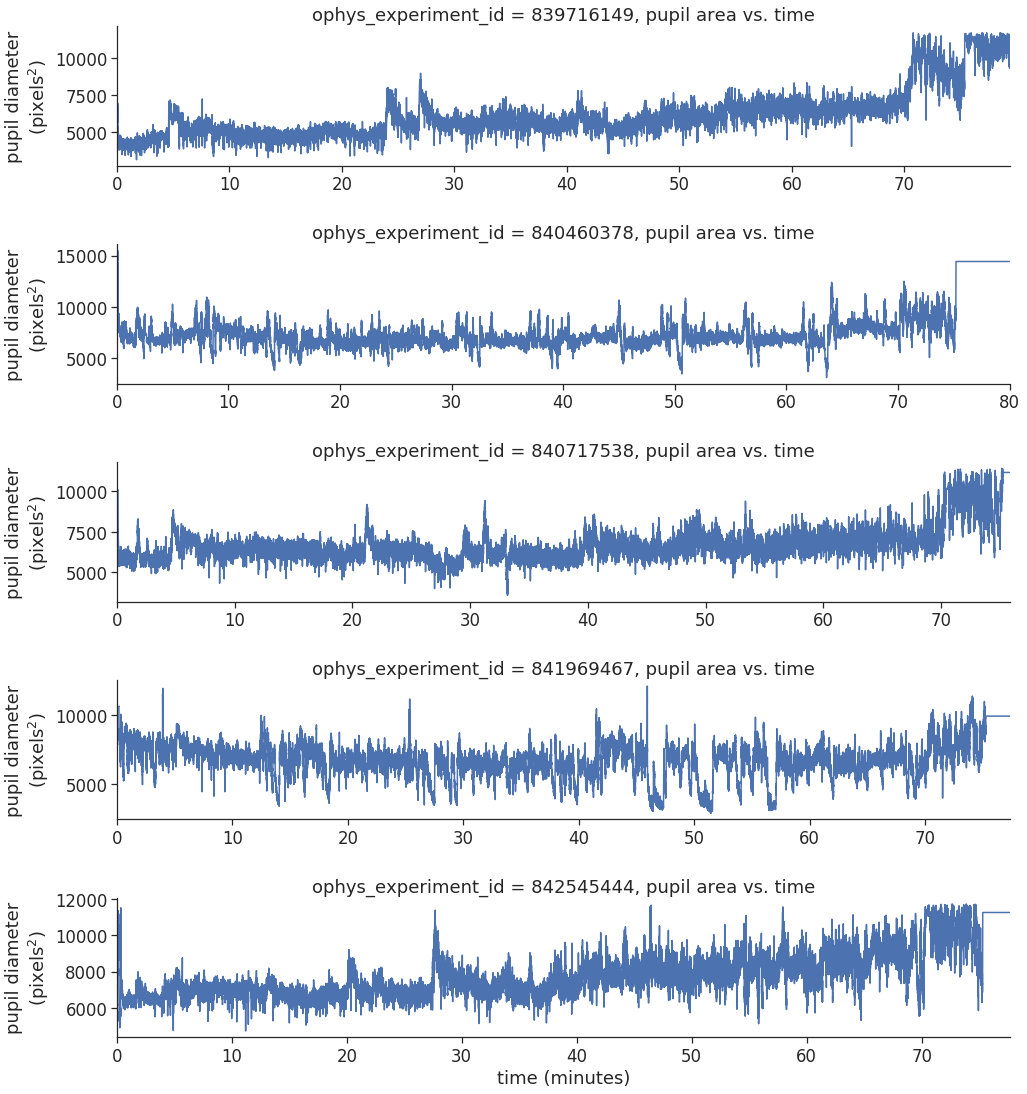

In [58]:
fig,ax = plot_pupil_area(ophys_container_id, save_figure=True);

In [59]:
savepath = os.path.join(dl.get_container_plots_dir(), 'pupil_area_vs_time', 'container_{}.png'.format(ophys_container_id))
savepath

'//allen/programs/braintv/workgroups/nc-ophys/visual_behavior/qc_plots/container_plots/pupil_area_vs_time/container_1016840755.png'

In [60]:
fig.savefig(savepath, dpi=300, pad_inches=0.0, bbox_inches='tight')

In [61]:
def make_pupil_position_plot(ophys_experiment_id, ax, label_x=True):
    try:
        ophys_session_id = db.convert_id({'ophys_experiment_id': ophys_experiment_id}, 'ophys_session_id')
        ed = EyeTrackingData(ophys_session_id)

        time = ed.ellipse_fits['pupil']['time']/60.
        x = ed.ellipse_fits['pupil']['blink_corrected_center_x']
        y = ed.ellipse_fits['pupil']['blink_corrected_center_y']
        
        ax.plot(time, x, color='darkorange')
        ax.plot(time, y, color='olive')
        
        if label_x:
            ax.set_xlabel('time (minutes)')
        ax.set_ylabel('pupil position (pixel)')
        ax.legend(['x position','y position'])
        ax.set_xlim(min(time),max(time))

        ax.set_title('ophys_experiment_id = {}, pupil center position vs. time'.format(ophys_experiment_id), ha='center')

    except Exception as e:
        ax.axis('off')

        error_text = 'could not generate pupil position plot for ophys_experiment_id {}\n{}'.format(ophys_experiment_id, e)
        ax.set_title(error_text, ha='left')
    return ax

/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



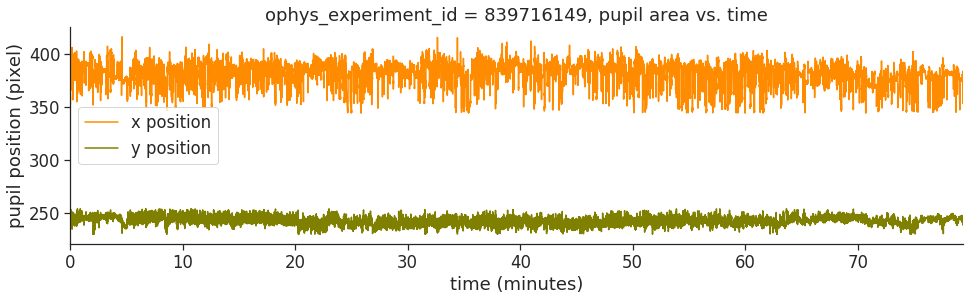

In [62]:
fig,ax=plt.subplots(figsize=(16,4))
make_pupil_position_plot(ophys_experiment_id, ax)

on ophys_experiment_id 839716149, #1 of 5


/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



on ophys_experiment_id 840460378, #2 of 5


/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



on ophys_experiment_id 840717538, #3 of 5


/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



on ophys_experiment_id 841969467, #4 of 5


/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



on ophys_experiment_id 842545444, #5 of 5


/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning:

invalid value encountered in true_divide



saving


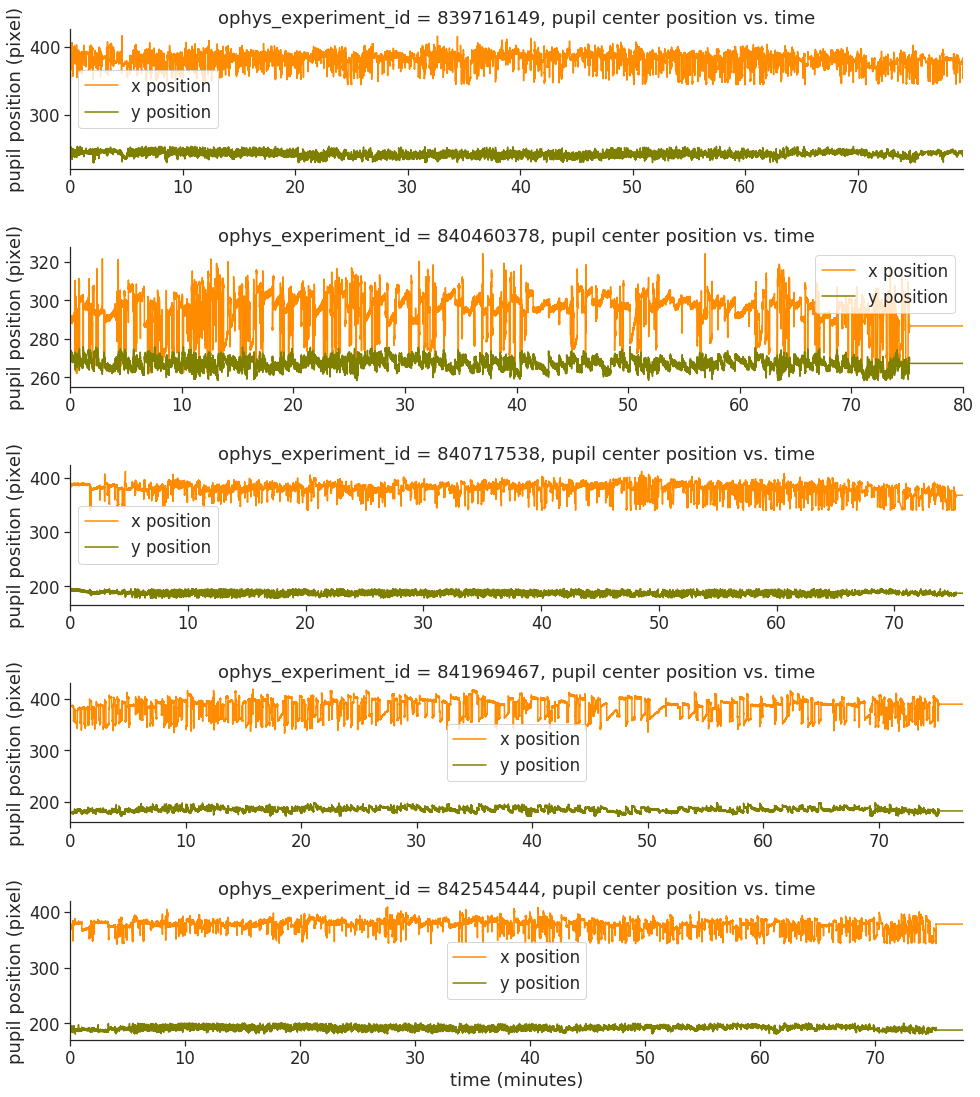

In [66]:
fig,ax = cp.plot_pupil_position(ophys_container_id, save_figure=True);